<a href="https://colab.research.google.com/github/Taewan0508/notebook-backtest_ma_strategy.ipynb/blob/main/backtest_ma_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2715764780.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("TSLA", start = "2020-01-01", end= "2025-01-01")
[*********************100%***********************]  1 of 1 completed


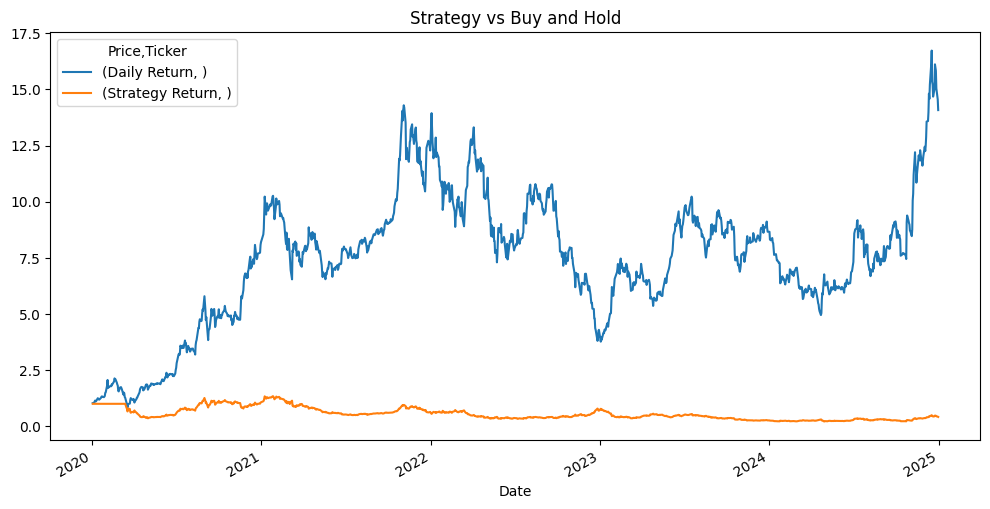

Total Return: 15.54%
Sharpe Ratio: 0.05


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

## Get the data
data = yf.download("TSLA", start = "2020-01-01", end= "2025-01-01")

## Use 'Close' safely from the DataFrame
data = data[['Close']].copy()

## Compute Moving averages
data = pd.DataFrame(data)
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

## Create Buy/Sell Signals
data['Signal'] = 0
data.loc[data['MA20'] > data['MA50'], 'Signal'] = 1 # Buy
data.loc[data['MA20'] < data['MA50'], 'Signal'] = -1 # Sell

## Calculate Strategy Returns
data['Daily Return'] = data['Close'].pct_change()
data['Strategy Return'] = data['Daily Return'] * data['Signal'].shift(1)

## Compare Strategy (Buy and Hold)
(1 + data[['Daily Return', 'Strategy Return']]).cumprod().plot(figsize=(12, 6))
plt.title("Strategy vs Buy and Hold")
plt.show()

## Evaluate Performance
total_return = data['Strategy Return'].sum()
sharpe_ratio = (data['Strategy Return'].mean() / data['Strategy Return'].std()) * np.sqrt(252)

print(f"Total Return: {total_return:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")